In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pltl
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import adjusted_rand_score
%matplotlib inline

# k-means

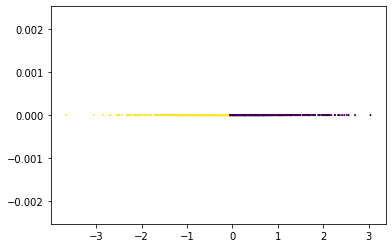

In [2]:
size = 1000
X = np.random.normal(size=size)
X = X.reshape(-1, 1)
Y = np.zeros(size)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X, Y, c=labels, s=1, cmap='viridis');

[[0.39447141 0.36096853]
 [0.51317543 0.78986707]
 [0.07211326 0.30577924]
 ...
 [0.55200129 0.72717145]
 [0.31163345 0.02986656]
 [0.69610421 0.5015681 ]]


Text(0.5, 1.0, 'Number of clusters is 2')

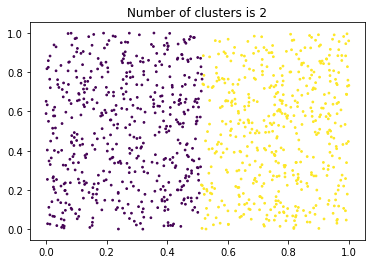

In [3]:
N = 1000
data = np.random.random((N, 2))
print(data)
labels = KMeans(2, random_state=0).fit_predict(data)
plt.scatter(data[:,0], data[:, 1], c=labels, s=3, cmap='viridis');
plt.title("Number of clusters is 2")

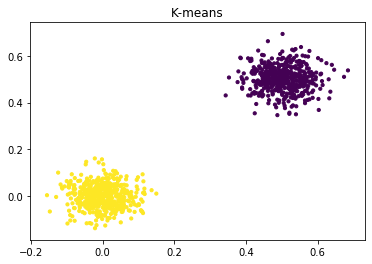

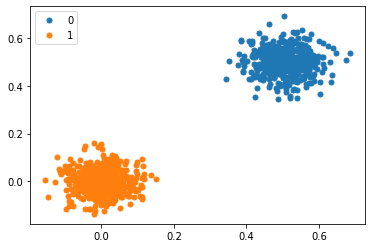

In [4]:
np.random.seed(1974)

# Generate Data
n1 = 500 # The size of cluster a
n2 = 500 # The size of cluster b

x1, y1 = np.random.normal(0, 0.05, n1), np.random.normal(0, 0.05, n1)
x2, y2 = np.random.normal(0.5, 0.05, n2), np.random.normal(0.5, 0.05, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))

groups = df.groupby('label')

#k-means
lab = KMeans(2, random_state=0).fit_predict(df)
plt.scatter(x, y, s=10, c=lab, cmap='viridis');
plt.title("K-means")


# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

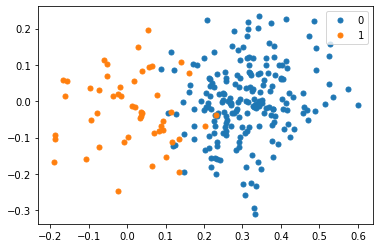

In [13]:
np.random.seed(1974)

# Generate Data
n1 = 50 # The size of cluster a
n2 = 200 # The size of cluster b

x1, y1 = np.random.normal(0, 0.1, n1), np.random.normal(0, 0.1, n1)
x2, y2 = np.random.normal(0.3, 0.1, n2), np.random.normal(0, 0.1, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

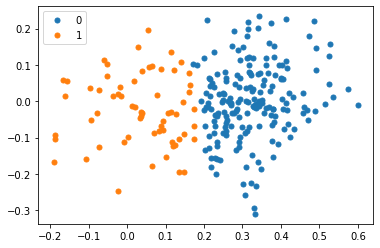

Adjusted random score: 0.72


In [15]:
# Apply k-means
cl = KMeans(2, random_state = 0).fit_predict(df[['x', 'y']])
df['cl'] = cl

# Plot
groups = df.groupby('cl')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()
print("Adjusted random score: %0.2f" % adjusted_rand_score(df.label, df.cl))

Text(0.5, 1.0, 'Number of clusters is 2')

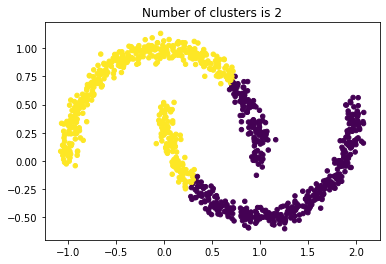

In [5]:
X, y = make_moons(1000, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');
plt.title("Number of clusters is 2")

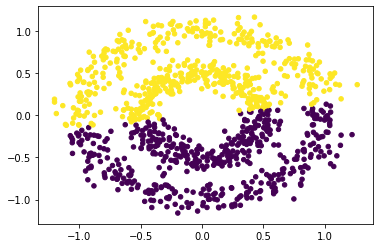

In [6]:
X, y = make_circles(1000, noise=0.09,factor=0.5, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');

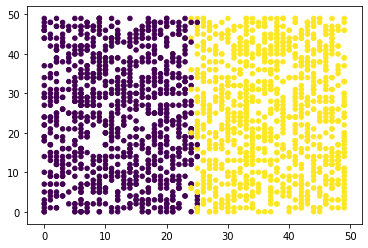

In [9]:
N = 1000
data = {'x': np.random.randint(0, 50, N),
        'y': np.random.randint(0, 50, N),
        'z': np.random.randint(0, 50, N)}
df1 = pd.DataFrame(data,columns= ['x','y', 'z'])

labels = KMeans(2, random_state=0).fit_predict(df1)
plt.scatter(df1['x'], df1['y'], c=labels,s=20, cmap='viridis');


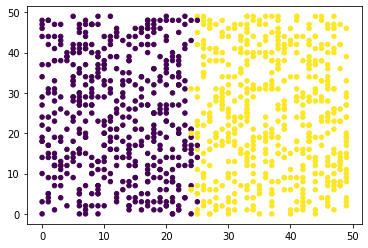

In [10]:
plt.scatter(df1['x'], df1['z'], c=labels,s=20, cmap='viridis');

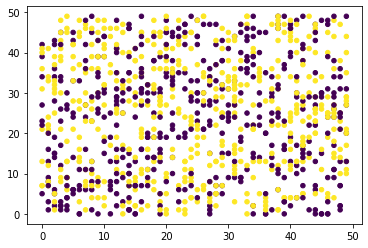

In [11]:
plt.scatter(df1['z'], df1['y'], c=labels,s=20, cmap='viridis');

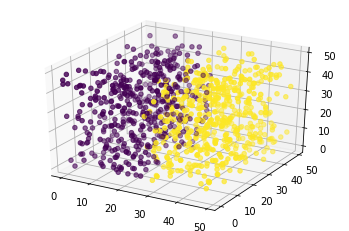

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1['x'], df1['y'], df1['z'], c=labels)

# Agglomerative Clustering

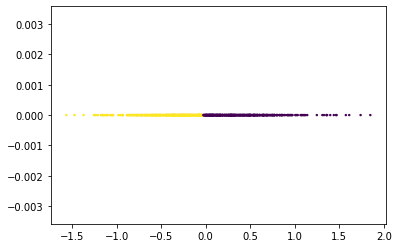

In [17]:
size = 1000
X = np.random.normal(size=size, scale = 0.5)
Y = np.zeros(size)
X = X.reshape(-1, 1)

clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean').fit(X)
AgglomerativeClustering()
clustering.labels_
plt.scatter(X, Y, c=clustering.labels_, s = 2)

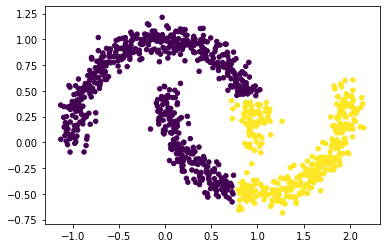

In [18]:
X, Y = make_moons(1000, noise=.08, random_state=0)
clustering = AgglomerativeClustering(n_clusters=2).fit(X)
AgglomerativeClustering()
clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=20, cmap='viridis')

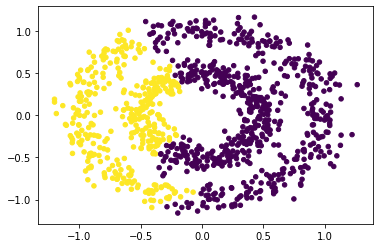

In [22]:
X, y = make_circles(1000, noise=0.09,factor=0.5, random_state=0)
clustering = AgglomerativeClustering(n_clusters=2).fit(X)
AgglomerativeClustering()
clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_,
            s=20, cmap='viridis');

Adjusted random score: 1.00


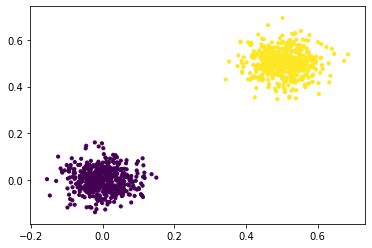

In [27]:
np.random.seed(1974)

# Generate Data
n1 = 500 # The size of cluster a
n2 = 500 # The size of cluster b

x1, y1 = np.random.normal(0, 0.05, n1), np.random.normal(0, 0.05, n1)
x2, y2 = np.random.normal(0.5, 0.05, n2), np.random.normal(0.5, 0.05, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))
groups = df.groupby('label')

#AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(df[['x','y']])
#print(model.labels_)
c = model.labels_
plt.scatter(x, y, c=c,
            s=10, cmap='viridis');

print("Adjusted random score: %0.2f" % adjusted_rand_score(df.label, c))

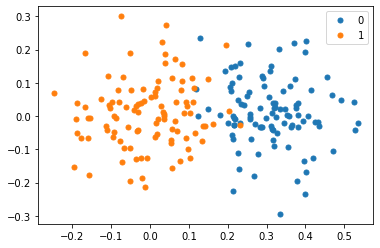

In [28]:
np.random.seed(1974)

# Generate Data
n1 = 100 # The size of cluster a
n2 = 100 # The size of cluster b

x1, y1 = np.random.normal(0, 0.1, n1), np.random.normal(0, 0.1, n1)
x2, y2 = np.random.normal(0.3, 0.1, n2), np.random.normal(0, 0.1, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()

Adjusted Rand Index: 0.883


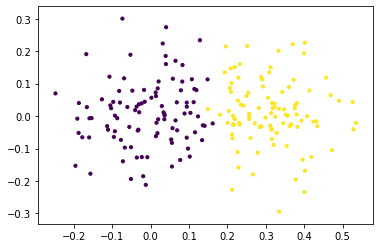

In [30]:
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(df[['x','y']])
#print(model.labels_)
c = model.labels_
plt.scatter(x, y, c=c,
            s=10, cmap='viridis');
print("Adjusted Rand Index: %0.3f"% adjusted_rand_score(df.label, c))

# DBSCAN

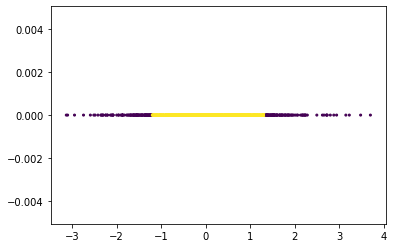

In [32]:
#load data
size = 1000
array = np.random.normal(size=size)
Y = np.zeros(size)
X = array.reshape(-1, 1)
# dbscan
db = DBSCAN(eps=0.2, min_samples=100)
db.fit(X)
#make plot
plt.figure()
plt.scatter(X, Y, c=db.labels_, s= 4)

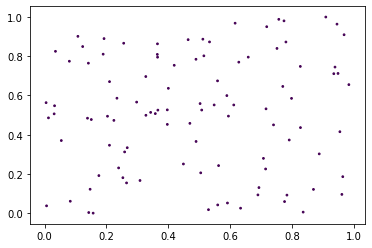

In [33]:
N = 100
data = np.random.random((N, 2))
db = DBSCAN(eps=0.5, min_samples=10)
db.fit(data)
labels = db.labels_
plt.scatter(data[:,0], data[:, 1], c=labels, s=3, cmap='viridis');

Text(0.5, 1.0, 'Number of clusters is 2')

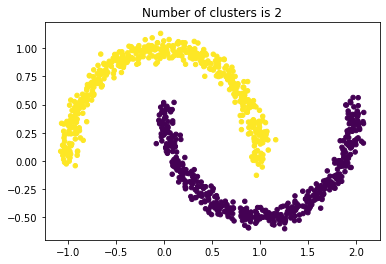

In [34]:
X, y = make_moons(1000, noise=.05, random_state=0)
db = DBSCAN(eps=0.1, min_samples=3)
db.fit(X)
labels = db.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');
plt.title("Number of clusters is 2")

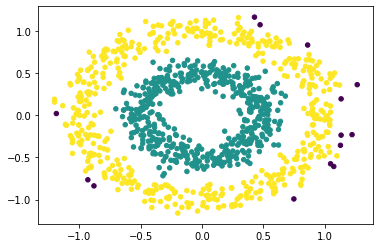

In [35]:
X, y = make_circles(1000, noise=0.09,factor=0.5, random_state=0)
db = DBSCAN(eps=0.1, min_samples=3)
db.fit(X,y)
labels = db.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='viridis');


Adjusted Rand Index: 1.000


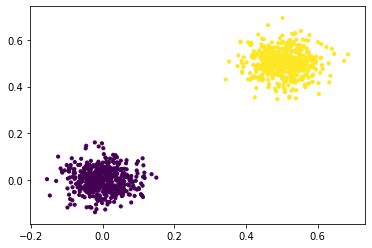

In [39]:
np.random.seed(1974)

# Generate Data
n1 = 500 # The size of cluster a
n2 = 500 # The size of cluster b

x1, y1 = np.random.normal(0, 0.05, n1), np.random.normal(0, 0.05, n1)
x2, y2 = np.random.normal(0.5, 0.05, n2), np.random.normal(0.5, 0.05, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))
#print(df)

groups = df.groupby('label')

#DBSCAN
model = DBSCAN(eps=0.1, min_samples=3)
model = model.fit(df[['x','y']])
cl = model.labels_
df['cl'] = cl
plt.scatter(x, y, c=cl,
            s=10, cmap='viridis')
print("Adjusted Rand Index: %0.3f"% adjusted_rand_score(df.label, cl))

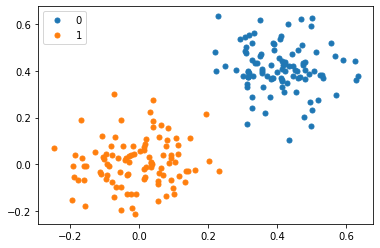

In [53]:
np.random.seed(1974)

# Generate Data
n1 = 100 # The size of cluster a
n2 = 100 # The size of cluster b

x1, y1 = np.random.normal(0, 0.1, n1), np.random.normal(0, 0.1, n1)
x2, y2 = np.random.normal(0.4, 0.1, n2), np.random.normal(0.4, 0.1, n2)
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

labels = ['1']*n1 + ['0']*n2

df = pd.DataFrame(dict(x = x, y = y, label = labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()



Adjusted Rand Index: 0.970


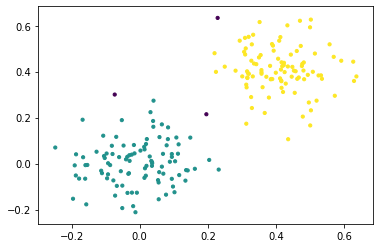

In [54]:
model = DBSCAN(eps=0.1, min_samples=3)
model = model.fit(df[['x','y']])
c = model.labels_
plt.scatter(x, y, c=c,
            s=10, cmap='viridis');
print("Adjusted Rand Index: %0.3f"% adjusted_rand_score(df.label, c))